# Lógica Fuzzy

## O problema da gorjeta - A maneira mais difícil
### Adicionando uma variável de controle - Poder aquisitivo

Nota: este método calcula tudo manualmente, passo a passo.

O "problema da gorjeta" é comumente usado para ilustrar o poder dos princípios da lógica difusa para gerar comportamento complexo a partir de um conjunto compacto e intuitivo de regras especializadas.

### Variáveis de entrada

Uma série de variáveis influenciam a decisão sobre quanto dar de gorjeta durante o jantar. Considere duas delas:

    - qualidade: qualidade da comida;
    - serviço: qualidade do serviço.
    - poder aquisitivo: dinheiro disponível.
    
### Variável de saída

A variável de saída é simplesmente o valor da gorjeta, em pontos percentuais:

    - gorjeta: porcentagem da conta a ser adicionada como gorjeta.

Para fins de discussão, digamos que precisamos das funções de associação "alta", "média" e "baixa" para as variáveis de entrada e nossa variável de saída. Eles são definidos em scikit-fuzzy como segue:

In [1]:
#Importação das bibliotecas
import numpy as np #usada principalmente para a realização de cálculos em arrays multidimensionais
import skfuzzy as fuzz #coleção de algorítmos de lógica difusa
import matplotlib.pyplot as plt #utilizada na criação de gráficos e visualização de dados em geral

In [2]:
# Gerando as variáveis
# * Qualidade, serviço e poder aquisitivo em faixas subjetivas [0, 10]
# * Gorjeta tem um intervalo de [0, 25] em unidades de pontos percentuais
x_qual = np.arange(0, 11, 1) #qualidade da comida
x_serv = np.arange(0, 11, 1) #qualidade so serviço
x_aqui = np.arange(0, 11, 1) #poder aquisitivo
x_gorj = np.arange(0, 26, 1) #percentual da gorjeta

### Função 'arange'

A função arange cria um array contendo uma seqüência de valores especificados em um intervalo com início e fim dos dados, espaçados de maneira uniforme. Os dados podem ter qualquer tipo numérico, especificado pelo argumento dtype. Esta função vai devolver um array unidimensional que pode ser usado em qualquer operação que exija arrays.

Chamada da função: arange(start, stop, step, dtype=None)   
    
Parâmetros:

    start -> Este argumento é opcional. Se ele for omitido, admite-se que o início do intervalo é 0. Se for especificado, o primeiro elemento do arranjo terá esse valor.
    
    stop -> Indica o final do intervalo. Como é característica da linguagem, este último valor não vai fazer parte do array retornado. É importante notar essa distinção. Se é necessário que esse valor seja parte do intervalo, utilize a função numpy-linspace.

    step -> Este argumento indica o intervalo entre cada elemento do arranjo. Pode ser um valor em ponto flutuante. Este argumento pode ser omitido, e nesse caso, admite-se o intervalo entre os elementos iguais a um.

    dtype -> Indica o tipo numérico dos elementos do arranjo resultante. Se for omitido, os dados terão o tipo mais simples possível para representar os números. 

In [3]:
#Gerando as funções de associação difusas
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])

serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])

aqui_lo = fuzz.trimf(x_aqui, [0, 0, 5])
aqui_md = fuzz.trimf(x_aqui, [0, 5, 10])
aqui_hi = fuzz.trimf(x_aqui, [5, 10, 10])

gorj_lo = fuzz.trimf(x_gorj, [0, 0, 13])
gorj_md = fuzz.trimf(x_gorj, [0, 13, 25])
gorj_hi = fuzz.trimf(x_gorj, [13, 25, 25])

### Função 'trimf'

Retorna uma função de associação triangular.

Chamada da função: trimf(x, abc)

Parâmetros: 
    
    x -> Array unidimensional. Variável independente.
    
    abc -> Array unidimensional de tamanho 3. Vetor de três elementos que controla a forma da função triangular.
        Requer a <= b <= c.

### Gráficos

Plotagem dos gráficos exibindo o universo das variáveis de controle e a variável de saída

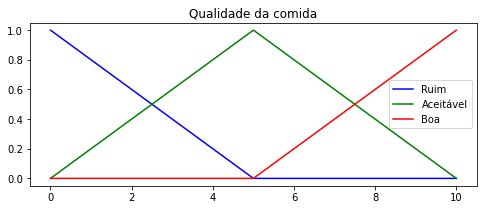

In [4]:
#Gráfico da variável de controle "Qualidade da comida" e suas funções de associação
fig, (ax0) = plt.subplots(nrows=1, figsize=(8, 3))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Ruim')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Aceitável')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Boa')
ax0.set_title('Qualidade da comida')
ax0.legend()

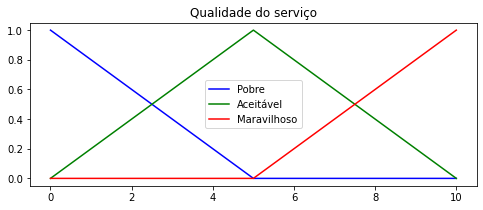

In [5]:
#Gráfico da variável de controle "Qualidade do serviço" e suas funções de associação
fig, (ax1) = plt.subplots(nrows=1, figsize=(8, 3))

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Pobre')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Aceitável')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Maravilhoso')
ax1.set_title('Qualidade do serviço')
ax1.legend()

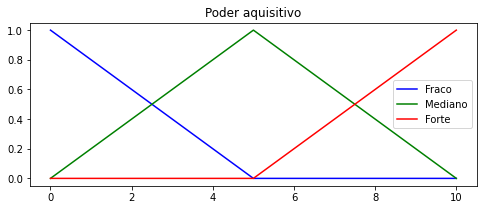

In [6]:
#Gráfico da variável de controle "Poder Aquisitivo" e suas funções de associação
fig, (ax2) = plt.subplots(nrows=1, figsize=(8, 3))

ax2.plot(x_aqui, aqui_lo, 'b', linewidth=1.5, label='Fraco')
ax2.plot(x_aqui, aqui_md, 'g', linewidth=1.5, label='Mediano')
ax2.plot(x_aqui, aqui_hi, 'r', linewidth=1.5, label='Forte')
ax2.set_title('Poder aquisitivo')
ax2.legend()

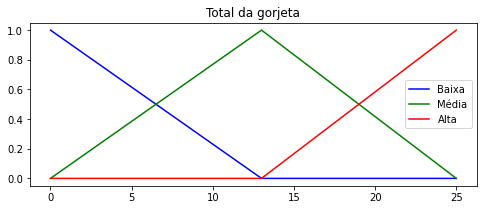

In [7]:
#Gráfico da variável de saída "Gorjeta" e suas funções de associação
fig, (ax3) = plt.subplots(nrows=1, figsize=(8, 3))

ax3.plot(x_gorj, gorj_lo, 'b', linewidth=1.5, label='Baixa')
ax3.plot(x_gorj, gorj_md, 'g', linewidth=1.5, label='Média')
ax3.plot(x_gorj, gorj_hi, 'r', linewidth=1.5, label='Alta')
ax3.set_title('Total da gorjeta')
ax3.legend()

In [8]:
#Desativa os eixos dos gráficos
for ax in (ax0, ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

### Regras Fuzzy

Agora, para tornar esses triângulos úteis, definimos a relação difusa entre as variáveis de entrada e saída. Para fins de nosso exemplo, considere três regras simples:

    Se a comida for ruim OU o serviço for ruim OU poder aquisitivo baixo, então a gorjeta será baixa
    Se o serviço for aceitável OU poder aquisitivo mediano, a gorjeta será média
    Se a comida for ótima OU o serviço for incrível OU poder aquisitivo forte, a gorjeta será alta.

A maioria das pessoas concordaria com essas regras, mas as regras são confusas. Mapear as regras imprecisas em uma gorjeta" definida e acionável é um desafio. Esse é o tipo de tarefa em que a lógica fuzzy se destaca.

### Aplicação de regra

Qual seria a gorjeta nas seguintes circunstâncias:
    
    A qualidade dos alimentos era de 4,3.
    O serviço foi de 4,6.
    O poder aquisitivo for de 9,8.

In [9]:
# Precisamos da ativação de nossas funções de associação difusa nesses valores.
# Os valores exatos 6,5 e 9,8 não existem em nossos universos ...
# É para isso que existe fuzz.interp_membership!
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 4.3)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, 4.3)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 4.6)

serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, 4.6)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, 4.6)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, 4.6)

aqui_level_lo = fuzz.interp_membership(x_aqui, aqui_lo, 9.8)
aqui_level_md = fuzz.interp_membership(x_aqui, aqui_md, 9.8)
aqui_level_hi = fuzz.interp_membership(x_aqui, aqui_hi, 9.8)

### Função 'interp_membership'

Retorna o grau de pertinência u(xx) para um determinado valor de x = xx.

Para uso em Lógica Fuzzy, onde uma função de pertinência discreta interpolada u(x) para valores discretos de x no universo de x é fornecida. Então, considere um novo valor x = xx, que não corresponde a nenhum valor discreto de x. Esta função calcula o valor de pertinência u(xx) correspondente ao valor xx usando interpolação linear.

Chamada da função: interp_membership(x, xmf, xx)

Parâmetros:

    x (1d array) -> Vetor de variável discreta independente.
    
    xmf (1d array) -> Função de associação difusa para x. Mesmo comprimento que x.
    
    xx (float) -> Valor único discreto no universo x.
    
Retorno: 

    xxmf (float) -> Valor da função de associação em xx, u(xx).

In [10]:
# Agora pegamos nossas regras e as aplicamos. A regra 1 diz respeito a comida OU serviço ruim.
# O operador OR significa que pegamos o máximo desses dois.
active_rule1 = np.fmax(aqui_level_lo, np.fmax(serv_level_lo, qual_level_lo,))

In [11]:
# Agora aplicamos isso cortando o topo da função de associação de saída correspondente com 'np.fmin'
gorj_activation_lo = np.fmin(active_rule1, gorj_lo)  #removido inteiramente para 0

In [12]:
#Para a regra 2, associamos o serviço aceitável à gorjeta média.
gorj_activation_md = np.fmin(aqui_level_md, np.fmin(serv_level_md, gorj_md))

In [13]:
#Para a regra 3, associamos serviço maravilhoso OU comida boa com gorjeta alta
active_rule3 = np.fmax(aqui_level_hi, np.fmax(qual_level_hi, serv_level_hi))
gorj_activation_hi = np.fmin(active_rule3, gorj_hi)
gorj0 = np.zeros_like(x_gorj)

### Visualização no gráfico

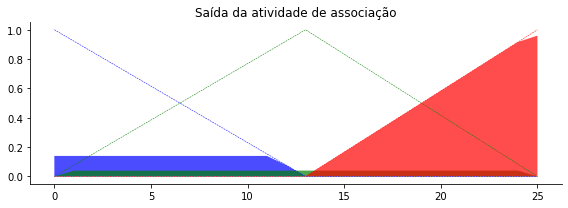

In [14]:
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_gorj, gorj0, gorj_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_gorj, gorj_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_gorj, gorj0, gorj_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_gorj, gorj_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_gorj, gorj0, gorj_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_gorj, gorj_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Saída da atividade de associação')

#Desativa os eixos dos gráficos
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

### Agregação de regra

Com a atividade de cada função de associação de saída conhecida, todas as funções de associação de saída devem ser combinadas. Isso normalmente é feito usando um operador máximo. Esta etapa também é conhecida como agregação.

### Defuzzificação

Finalmente, para obter uma resposta do mundo real, retornamos à lógica nítida do mundo das funções de associação difusas. Para os fins deste exemplo, o método do centróide será usado.

O resultado é uma gorjeta de 17.674%.

In [15]:
#Agregar todas as três funções de associação de saída
aggregated = np.fmax(gorj_activation_lo, np.fmax(gorj_activation_md, gorj_activation_hi))

In [16]:
#Calcular resultado defuzzificado
gorj = fuzz.defuzz(x_gorj, aggregated, 'centroid')
gorj_activation = fuzz.interp_membership(x_gorj, aggregated, gorj)  #para a plotagem do gráfico

### Função 'defuzz'

Defuzzificação de uma função de pertinência, retornando um valor defuzzificado da função em x, usando vários métodos de defuzzificação.

Chamada da função: defuzz(x, mfx, mode)

Parâmetros:

    x (Array 1d de iterável, comprimento N) -> Variável independente.
    
    mfx (Array 1d de iterável, comprimento N) -> Função de associação difusa.
    
    mode (String) -> Controla qual método de defuzzificação será usado.
        
        - centroid: Centróide da área
        - bisector: bissetriz da área
        - mom: média do máximo
        - som: mínimo do máximo
        - lom: máximo do máximo
        
Retorno:

    u (float ou int) -> Resultado defuzzificado.

### Gráfico

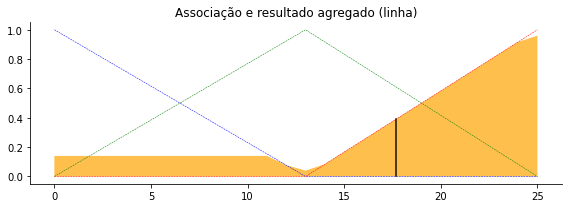

In [17]:
#Área de visualização
ig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_gorj, gorj_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_gorj, gorj_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_gorj, gorj_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_gorj, gorj0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([gorj, gorj], [0, gorj_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Associação e resultado agregado (linha)')

#Desativa os eixos dos gráficos
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

### Considerações finais

O poder dos sistemas difusos permite um comportamento intuitivo e complicado com base em um sistema esparso de regras com sobrecarga mínima. Observe que nossos universos de função de pertinência eram grosseiros, definidos apenas em inteiros, mas "fuzz.interp_membership" permitiu que a resolução efetiva aumentasse sob demanda. Este sistema pode responder a mudanças arbitrariamente pequenas nas entradas e a carga de processamento é mínima.

In [18]:
gorj

17.674119173570215